In [1]:
# sklearn has built-in iris dataset
# load and store it as numpy array for further matrix calculations in PCA
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# iris dataset has 4 features and output is a species of flower which is either Setosa, Virginica or Verscicolor

In [2]:
iris = datasets.load_iris()
R = np.array(iris.data)

# How PCA works?
**To analyse and build new dataset (reduced in dimensions) from original one by PCA, Following steps are used in general:**

* Calculate the covariance matrix of data
* Calculate the eigenvalues and eigenvectors over covariance matrix
* Choose the principal components
* Construct new featured dataset from chosen components

# 1st step: Calculate the covariance matrix
Covariance matrix is just a matrix of covariance of features (dimensions). Covariance is the variance of 2 features; in other words, how 2 features vary from each other. It is a very useful information when you need to extract new patterns or features from existing features. Therefore, as 2nd step we need to calculate covariance matrix of our dataset. Since there are 4 features in data, we have 6 covariances to calculate, and 4 variances.

In [3]:
# numpy has an API to calculate a covariance matrix
# y-axes will be used for calculations
R_cov = np.cov(R, rowvar=False)

# print the covariance matrix

iris_covmat = pd.DataFrame(data=R_cov, columns=iris.feature_names)
iris_covmat.index = iris.feature_names

Below, we have the result covariance matrix. Diagonal values are variances of each feature but we are not interested in them because we try to find new patterns/features among existing features. Therefore, other entries except for those in diagonal are essential for PCA.
As cov(a, b) = cov(b, a), up and bottom sides of diagonal in covariance matrix are equal. If covariance of (a, b) is positive, a and b varies together; if negative, they vary in different directions. As an example, from the matrix below, petal_length and petal_width features of a flower in dataset has a positive covariance (1.296287), it means these 2 features increases or decreases together. When you check these 2 features of some of the samples from the dataset, you can see it.

In [4]:
iris_covmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


# 2nd Step Calculate the eigenvalues and eigenvectors

* Eigenvalues and eigenvectors are the heart of PCA; well not only inPCA, but also in others like SVD, LDA. But why they are so important? Eigenvalues and Eigenvectors which are associated constitute the root characteristics of a matrix equations. I will leave the explanation of this to this source and will continue with important features of eigenvectors and eigenvalues for PCA.
* There are 3 simple features we need to know about them: First, we can only calculate eigenvalues/eigenvectors of a square matrix (n x n, covariance of matrix). Second, eigenvectors are perpendicular/orthogonal to each other. If we have n-dimensional matrix so we have n eigenvectors in n-space and all of them are perpendicular. This makes sense because all of them constitutes the data they represents. Lastly, length of eigenvectors are exactly 1 and each has a corresponding eigenvalue which represents the power of the vector.
* Since we are looking for new features to reduce the dimensionality in our data, the eigenvectors of covariance matrix of data are calculated to find patterns (eigenvectors) with their significance (eigenvalues). Eigenvectors of covariance matrix will represent new features and we will choose some of them according to their eigenvalue power or impact. Let’s do this on our iris example. We have already had covariance matrix and it’s a square matrix!

In [6]:
# numpy linear algebra module eig() api
# Compute the eigenvalues and eigenvectors of a square array
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print values and corresponding vectors
print(eig_values)
print()
print(eig_vectors)

[4.22824171 0.24267075 0.0782095  0.02383509]

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


# Step 3 Choose principal components
* From the first result, we have a eigenvalue for each dimension in data and a corresponding eigenvector in results as listed above. What we need to do now is to order eigenvalues in value from highest to lowest. And then, we pick some of the eigenvectors with highest value to build our new features.
* As we discussed earlier, eigenvalues represents the impact or power of a vector, so we must pick the eigenvectors whose eigenvalue is higher in value. In this case, since we want to reduce the dimensionality of iris data to 2, we will pick the first eigenvectors because their eigenvalues are the highest 2 in results. The selected highest value eigenvectors will be our principal components to build new featured and reduced dataset. And, we will call this matrix as new feature vector.

**By dropping some of the components or eigenvalues/eigenvectors we will loose some information. However, since we choose the components having highest values or importance, this loose will be reasonable. By dropping, we will have data in less dimension to work.**

In [7]:
# pick 2 eigenvectors whose eigenvalues are highest
featureVector = eig_vectors[:,:2]
featureVector

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

# Step 4 Build new reduced dataset
Now, we are ready to build new reduced data from selected principal components from the previous step. To build new dataset, we need to multiply the transpose of original matrix (R) on the left of the transpose of new feature vector (selected principal components).
Image for post
Why we multiplied transposed of original dataset and principal components is to get new data in terms of eigenvectors we choose. I know it seems to be complicated but you can find visual explanation of these steps taken so far.
Image for post

In [8]:
from IPython.display import Image, display

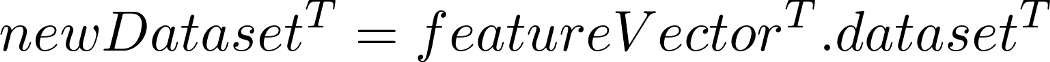

In [10]:
Image(filename='D:\\Machine_Learning_KTH\\ML_Projects_Learning\\PCA\\mat.png')

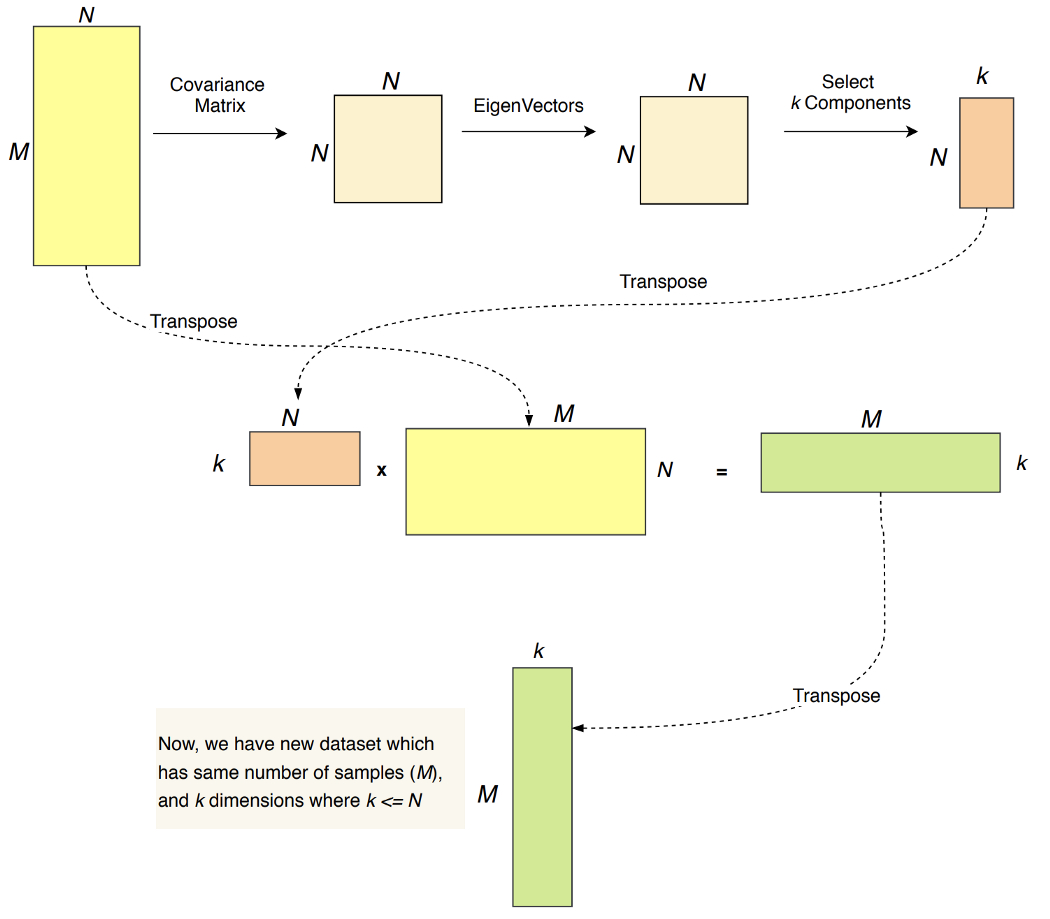

In [9]:
Image(filename='D:\\Machine_Learning_KTH\\ML_Projects_Learning\\PCA\\pca.png')

**And here is the code to produce new 2D data from selected components for iris dataset.**

In [11]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape

(150, 2)

* At last, we have 2D reduced new dataset in our hands. Of course, it has lost some information but since we selected 2 major eigenvectors, new features we built from selected components should be enough to go further. If not, we can consider to increase the number of components to build new dataset.
* Now, let’s do some visualization. At first, our dataset had 4 dimensions and it was impossible to plot, but it is a 2D data and will be easy to plot.

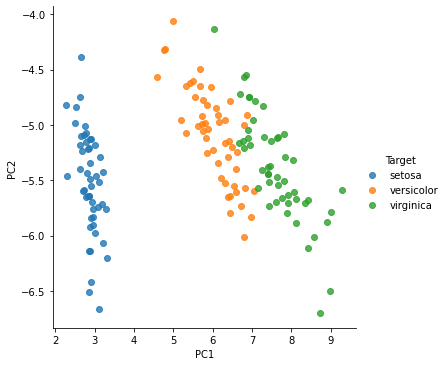

In [12]:
import seaborn as sns
import pandas as pd
%matplotlib inline

# create new DataFrame
df = pd.DataFrame(data=newDataset, columns=['PC1', 'PC2'])
y = pd.Series(iris.target)
y = y.replace(0, 'setosa')
y = y.replace(1, 'versicolor')
y = y.replace(2, 'virginica')
df['Target'] = y 

# plot 2D data
sns.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg=False, legend=True)